# Identifying Customers Likely to Churn for a Telecommunications Provider

## Introduction

We will explore and analyse a dataset from a telecommunications provider, which provides data on 4250 customers in a specific time period. We aim to identify which customers are likely to [churn](https://en.wikipedia.org/wiki/Customer_attrition), or stop using the product.

The dataset has been cleaned and modified for analysis. Here is a quick snapshot of the data:

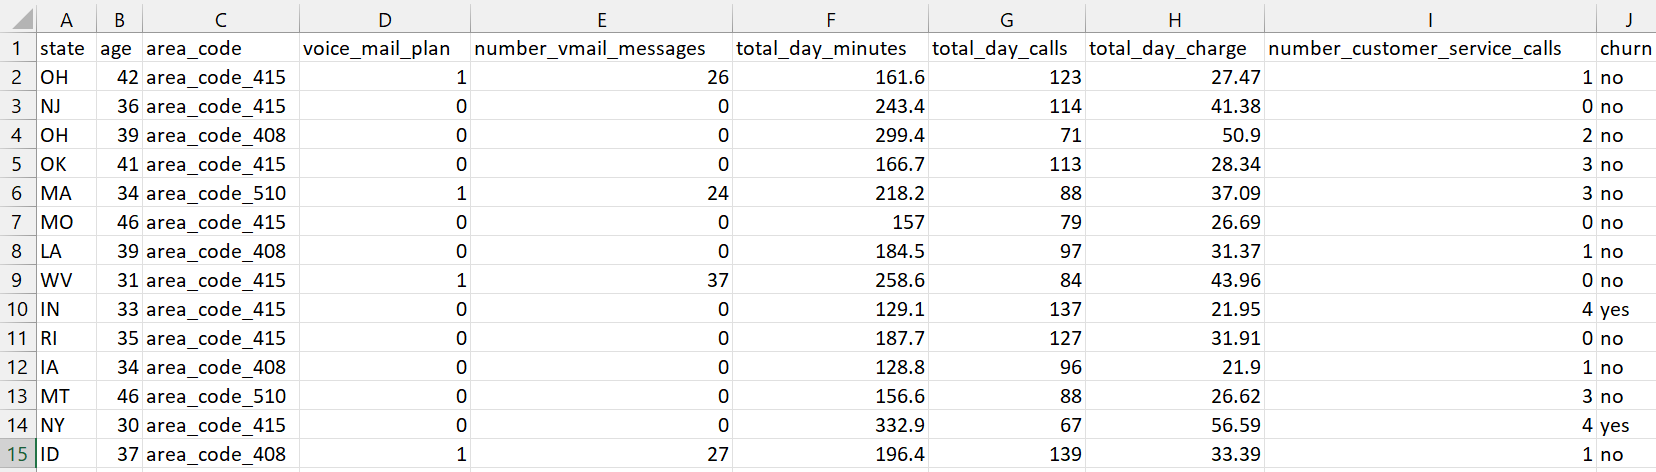

We only require the actual area code, so we can remove the `"area_code_"` part from the `area_code` column. We will use `=RIGHT(C2,3)` and the fill handle to populate the rest of the column.  

It will be useful for our analysis to have a `1` and `0` instead of `yes` and `no` in the `churn` column. We will use the formula `=IFS(J2="no",0,J2="yes",1)` and the fill handle to populate the remaining values.

After making these changes:

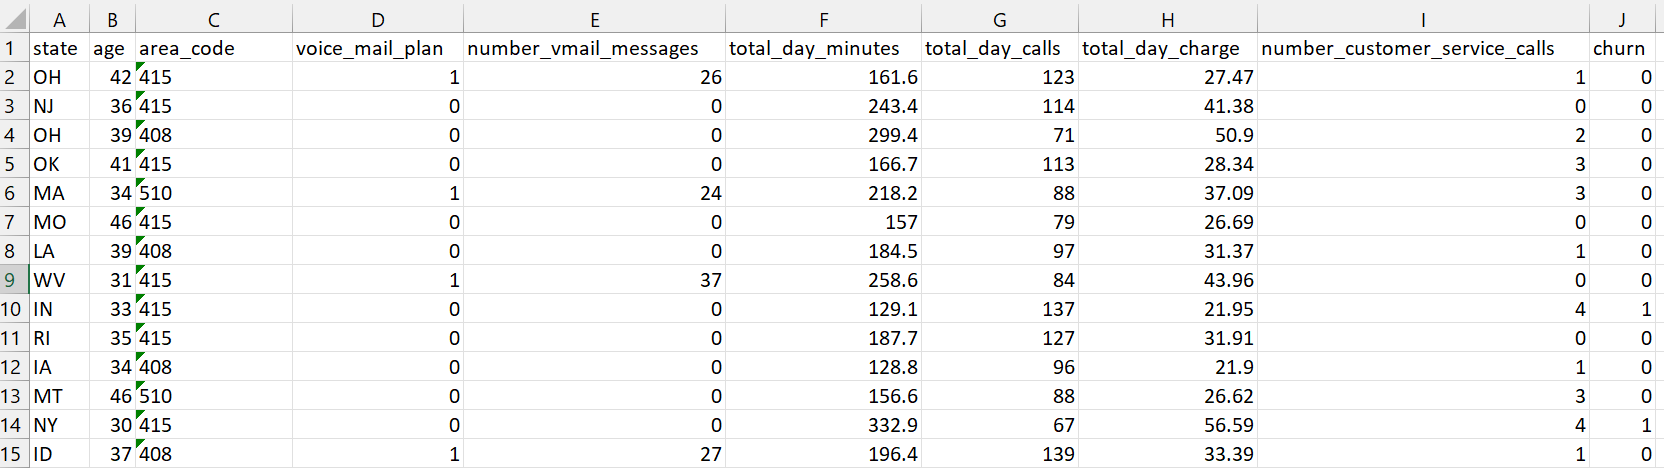

Columns which could explain customer attrition:

- `total_day_charge`: Customers could churn if they found a cheaper plan elsewhere
- `voice_mail_plan`: If customers don't use a voicemail plan in the first place, they may choose to opt out of the product
- `number_customer_service_calls`: If customers often call customer service (to fix problems) they may leave this provider and find a more reliable one

## Churn Rate

Now that the values of the `churn` column are numerical, we can calculate the **churn rate**, which tells us the percentage of customers who stopped using the product in a given time period.

$$\text{Churn Rate} = \frac{\text{Number of customers who churned}}{\text{Total number of customers}}*100$$

The churn rate can thus be calculated as follows:

`=SUM(J2:J4251)/COUNT(J2:J4251)` which gives a value of:


This does not seem too high, however context is important. Different industries may have different churn rates, so it will help to research churn rates in the telecommunications industry. According to this [article](https://www.paddle.com/resources/industry-retention-rates), customer retention rates in the telecom industry is 78%, meaning the churn rate is 22%. Relative to this, our churn rate of 14% indeed isn't too high, but it's still a considerable amount.

## Initial EDA (Exploratory Data Analysis)

Our dataset is already cleaned, however it is still a good idea to check if there is any missing data. Copying all the numerical columns to a new worksheet (recall that `area_code` is a number but doesn't necessarily have any numerical value. It is simply a geographic identifier), let's do some initial EDA:

Using Excel functions, for each numerical column we calculate the number of missing values and some basic descriptive statistics:

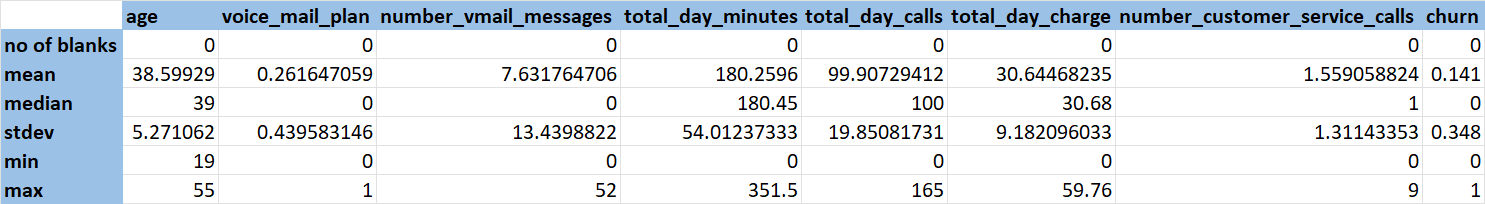

Initial observations:

- There are no missing data.
- The `total_day_minutes`, `total_day_calls` and `number_vmail_messages` columns have the most variation, according to the standard deviation.
- Most columns have a similar mean and median, except the `number_vmail_messages` column, which indicates its distribution may be skewed.
- `voicemail_plan` and `churn` are qualitative, so most of their descriptive statistics aren't helpful. 

## Exploring Data Grouped by `State` and `churn`

When considered independently, the `total_day_minutes`, `total_day_calls`, `number_vmail_messages`, `voicemail_plan` and `churn` variables don't offer much insight (reason above).

So now let's group the data using a PivotTable to see what we can glean:

We'll make a PivotTable with `state` and `churn` as rows and the following values as PivotTable fields:

- Average of `age`
- Sum of `voice_mail_plan`
- Sum of `number_vmail_messages`
- Average of `total_day_minutes`
- Count of `total_day_calls`
- Sum of `number_customer_service_calls`
- `Churn` rate (trick: use the sum of `churn` represented as a % of grand total)

To see which states have the highest churn rate, we'll sort the PivotTable by `churn` in descending order (use "More Sort Options" in the dropdown menu).

Let's look at the 5 states with the highest churn rate and make some observations based on those who churned vs. those who didn't:

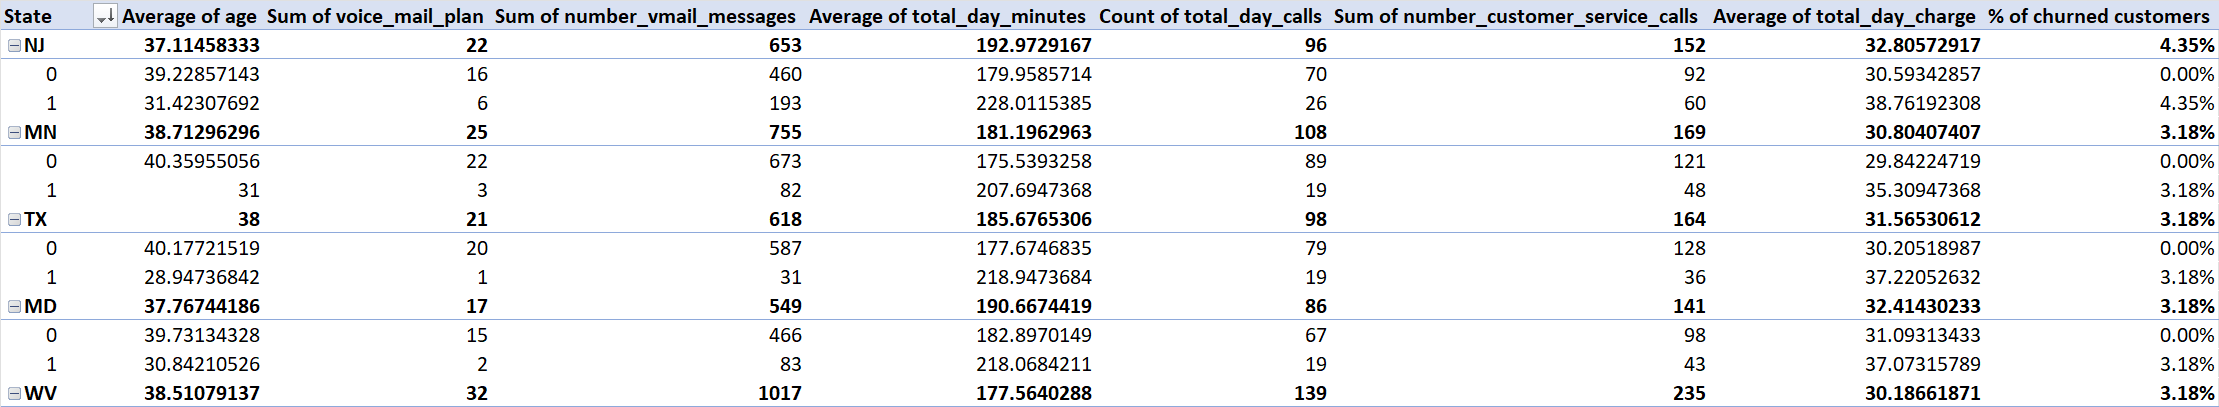

The customers who churned:

- Were younger, on average
- Less of them had a voicemail plan
- They had less voicemail messages, less daily calls and less calls to customer services
- They had more total daily minutes, on average
- They had a higher average daily charge

New Jersey (NJ) makes the largest contribution to churned customers: `4.35%`. Minnesota (MN), Texas (TX), Maryland (MD) and West Virginia (WV) are in joint second place, with `3.18%`.

Now let's group the data by `area_code`:

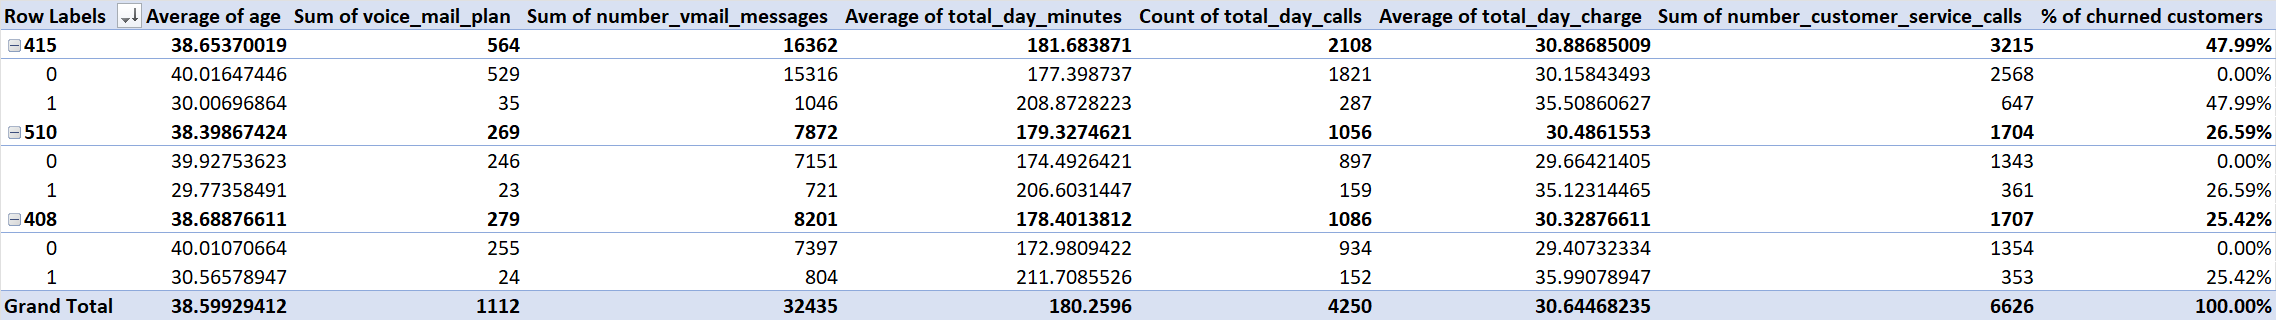

Grouping by area code, we make the exact same observations. However, we also note that the area with area code `415` makes up a disproportionately large percentage of churned customers, `47.99%`.

## Exploring Data Grouped by `voice_mail_plan` and `churn`

Let's group our data by `voice_mail_plan`:

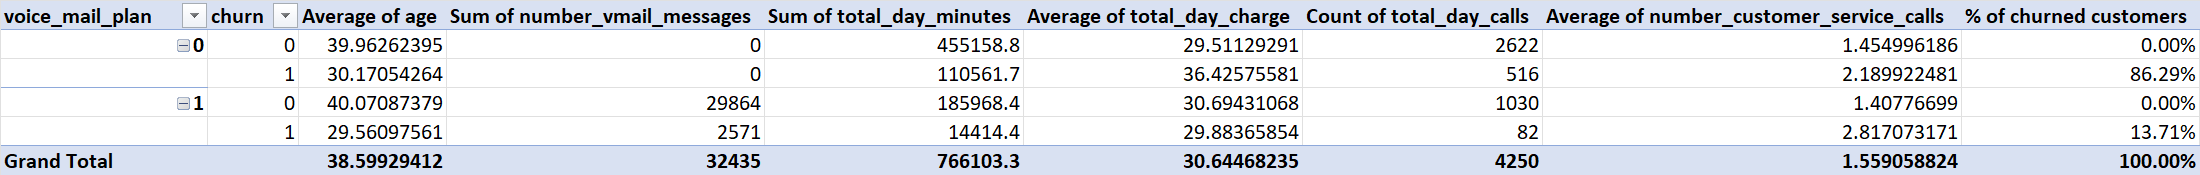

Observations:

- There are some `0`s in the `sum of number_vmail_messages` column; this is because those customers didn't have a voicemail plan.
- Customers who churned were younger and made more calls to customer services, regardless of their voicemail plan status.
- From the customers who had a voicemail plan, those who churned had significantly less voicemail messages, total daily minutes and number of daily calls. However, they were charged about the same as those who didn't churn, on average.
- Of the customers without a voicemail plan, the ones who churned also had less total daily minutes and calls. They were charged more, on average. 
- Customers with no voicemail plan make up the vast majority of those who churned: `86.29%`.

## Analysing Frequency Distributions

We now explore these patterns and relationships using visualisations. Let's first look at the individual distributions of the numerical columns. To do this, we'll copy the numerical columns to a new worksheet and create a histogram for each. While making the visualisations, we keep in mind information design principles, namely maximising the data-ink ratio by removing chart junk and optimising use of data-ink. 

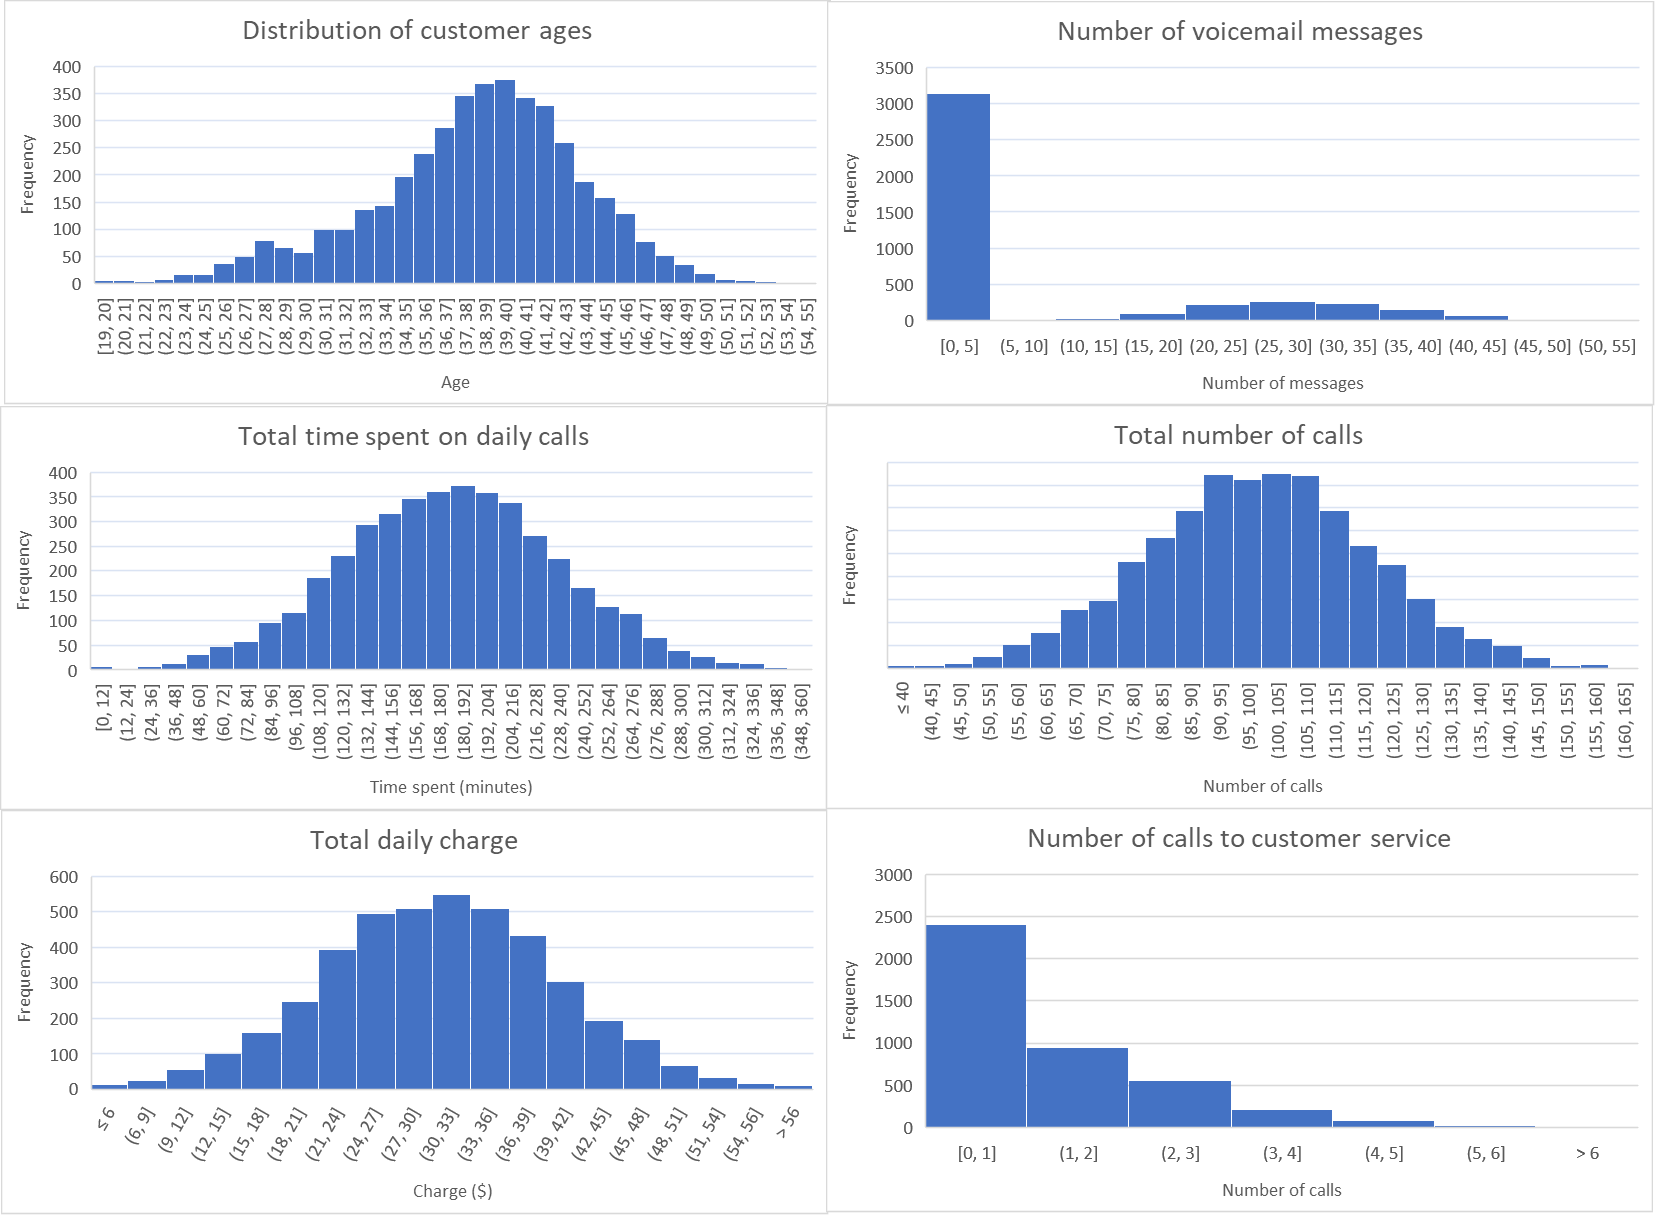

Observations:

- The age is roughly normally distributed, with most ages in the range 30-45. This is in line with the fact that the mean and median are roughly equal.

- Over 3000 customers had less than 6 voicemail messages. Most of the remaining customers had between 20 and 40 voicemail messages. The distribution is right-skewed, as is confirmed by the mean, $\approx$7, much larger than the median of 0. The high standard deviation also demonstrates this.

- The distribution of time spent on daily calls is normally distributed, with most customers spending 100-250 minutes on calls. The mean and median are very close, confirming the normal distribution.

- The total number of calls also shows a bell-curve, with the majority of customers making between 70 and 130 calls. The mean and median are almost equal, supporting this.

- The total daily charge is distributed normally (backed up by the roughly equal median and mean); most customers are charged \\$15-\\$45 a day. 

- The distribution of the number of calls to customer service is right-skewed, with nearly 2500 customers making less than 2 calls, and the vast majority making less than 4 calls. This skew is confirmed by the mean of $\approx$1.56 compared to the median of 1.

## Visualising Data Grouped by `State` and `churn`

We analysed the data grouped by `State` and `churn` in the PivotTable earlier, but with some difficulty, as the data was tabular. Visualisations make it easier to see patterns in and explore our data. First, let's make some changes to our PivotTable, concentrating on the 3 states with the largest contribution to churn.

We will now add `churn` as rows and `State` as columns, with the average `age` as values. Filtering for `NJ`, `MN` and `TX` and removing the Grand Totals:

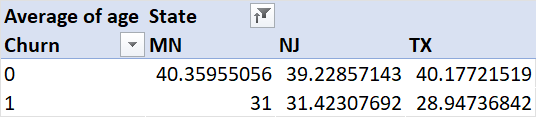

Let's now create a bar chart, keeping Gestalt principles and pre-attentive attributes in mind:

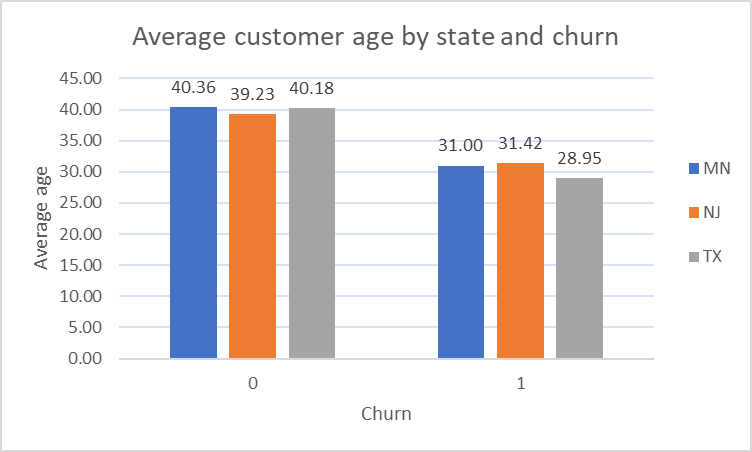

Observation: 

- Regardless of state, customers who churned were around 10 years younger, on average.

Let's repeat this for some more variables that we deemed relevant to churn:

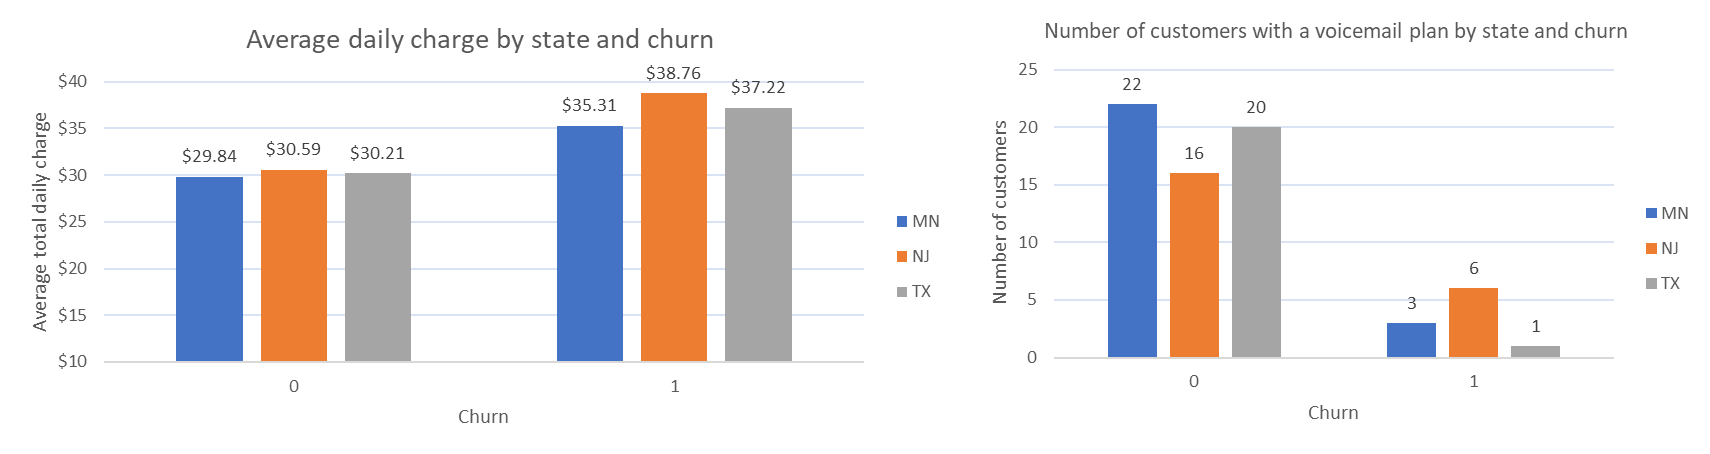

Observations: 

- Regardless of state, customers who churned were charged more and less of them had a voicemail plan.
- More customers who churned in New Jersey had a voicemail plan, compared to Minnesota and Texas.

## Visualising Data Grouped by `area_code` and `churn`

Let's now do the same thing, but group the area by `area_code`:

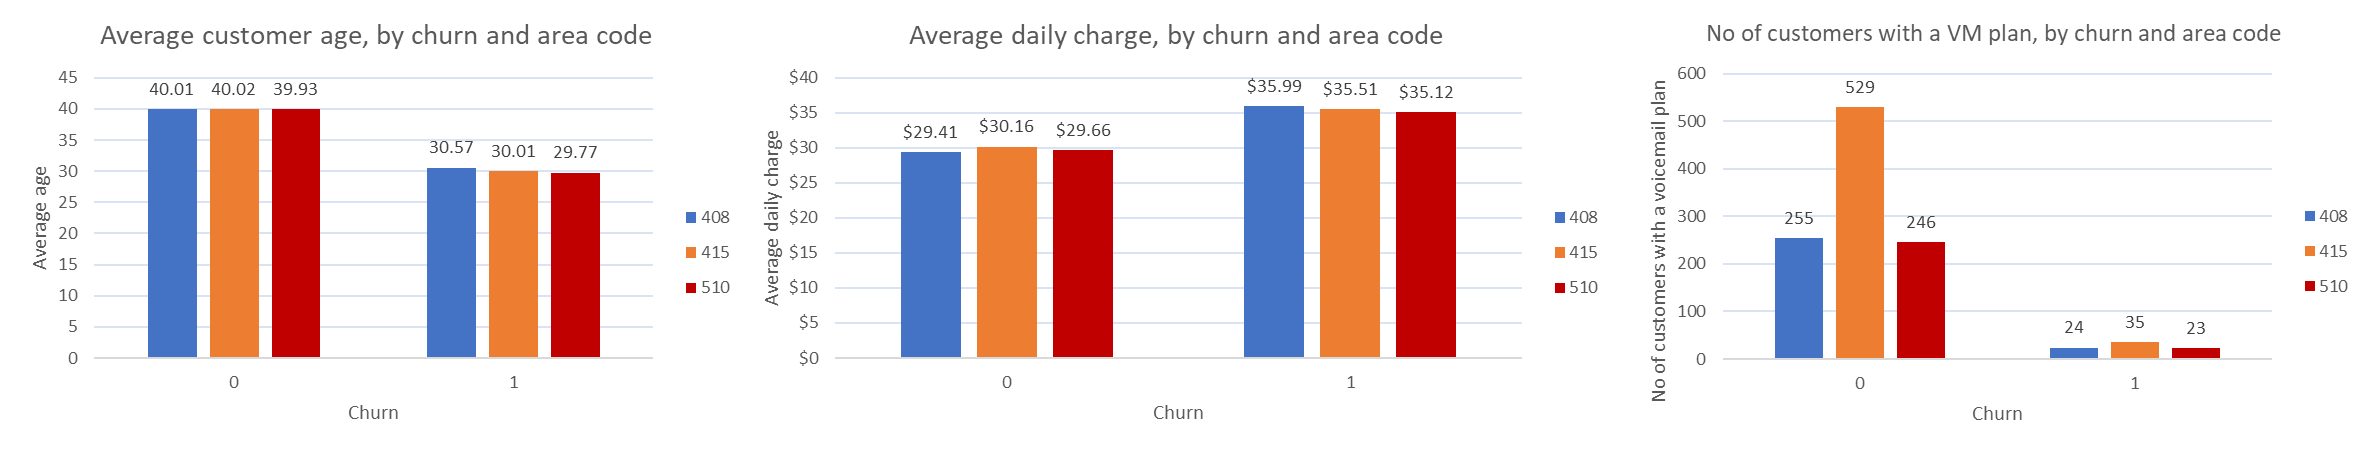

Observations:

- Regardless of area, customers who churned were around 10 years younger, were charged a daily average of $\approx$\\$6 more, and less had a voicemail plan.
- Many more customers who didn't churn in area `415` had a voicemail plan, more than twice as much as the other areas.

## Exploring and Visualising Data Grouped by Churn

In our initial EDA, we identified some fields relevant to churn. Let's now explore their relationships visually:

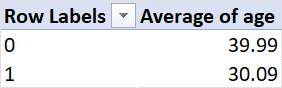

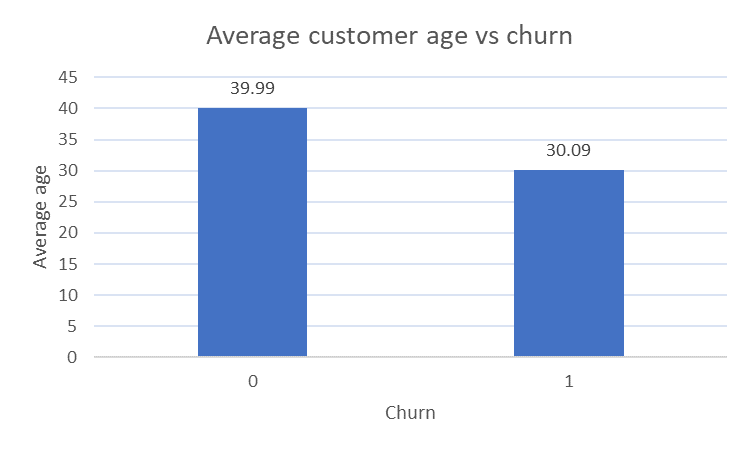

Let's repeat this for some more variables relevant to churn: `total_day_charge`, `voice_mail_plan` and `number_customer_service_calls`:

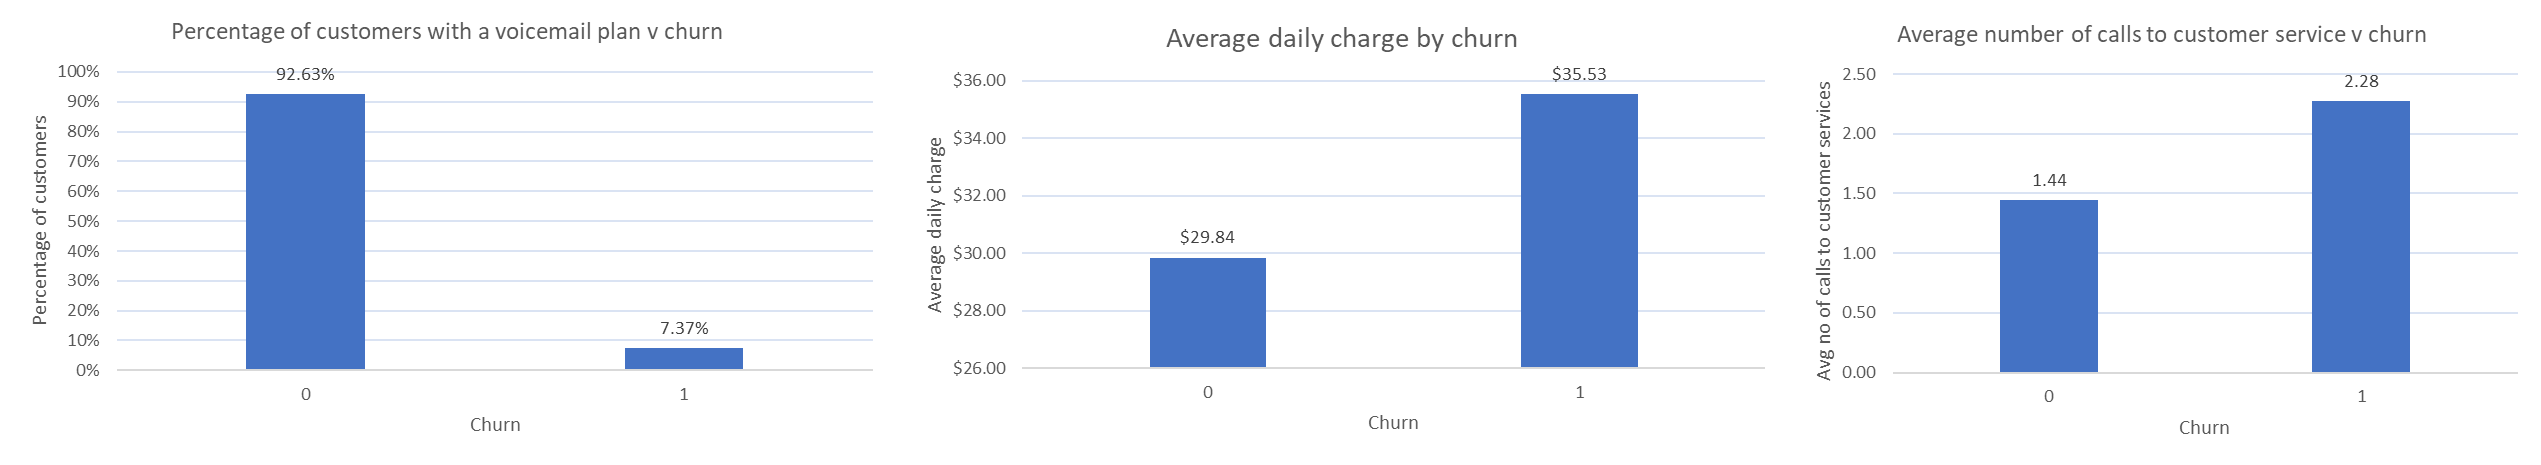

Observations:

- Churned customers were around 10 years younger, on average.
- Much fewer churned customers had a voicemail plan.
- Churned customers were charged around \\$5 more, on average.
- Churned customers made more calls to customer services, on average. This is in line with what we found when we broke down the customers by voicemail plan. However, this contradicts what we saw when we broke down the data by state, for the 5 states with highest rates of churn. This indicates there might be something different about the states with most churn.

## Final Report

Here we consolidate our findings and insights in a concise report which may be communicated to stakeholders. Using our analyses, we'll create a customer profile that helps identify who will be likely to churn.

### Summary of data

- Around 14% of customers churned. This is less than the [telecommunications industry's average](https://www.paddle.com/resources/industry-retention-rates) of 22%, but is still a considerable amount.


- Summary statistics of the top 5 states by percentage of customers who churned. New Jersey makes up the largest portion, `4.35%`:

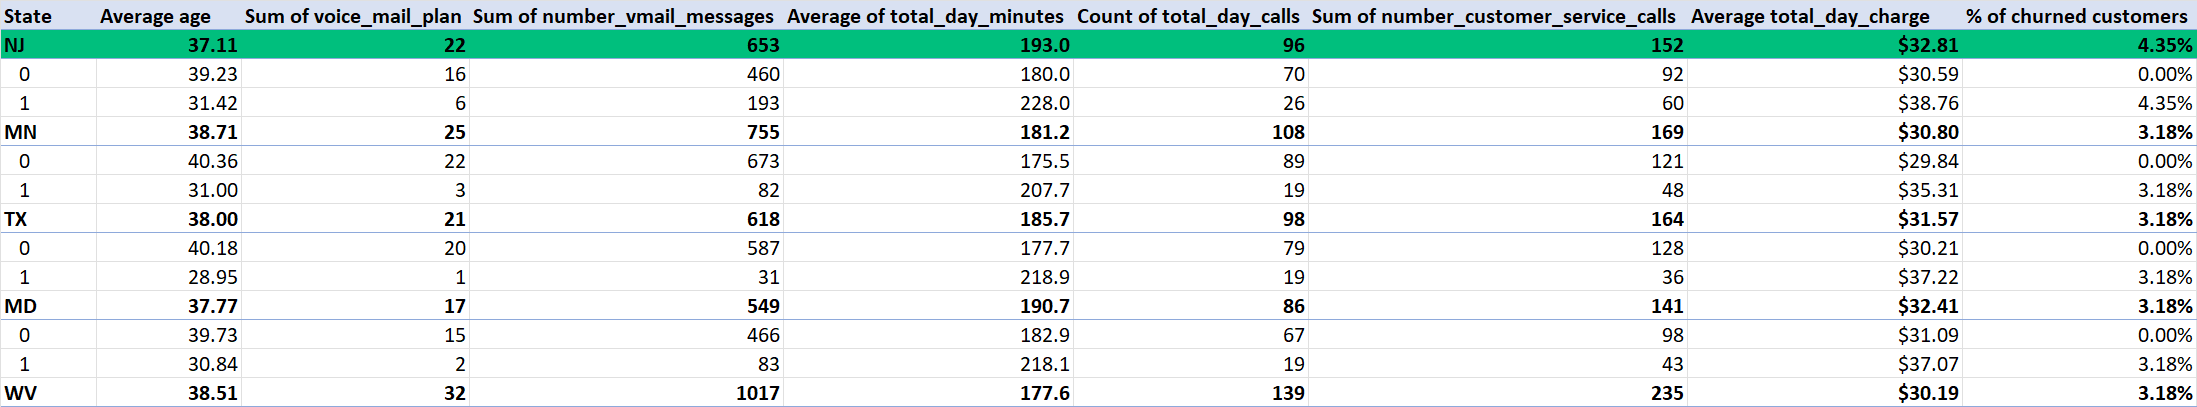

- Data sorted by area code with the most churned customers. Area `415` makes up `47.99%` of churned customers:

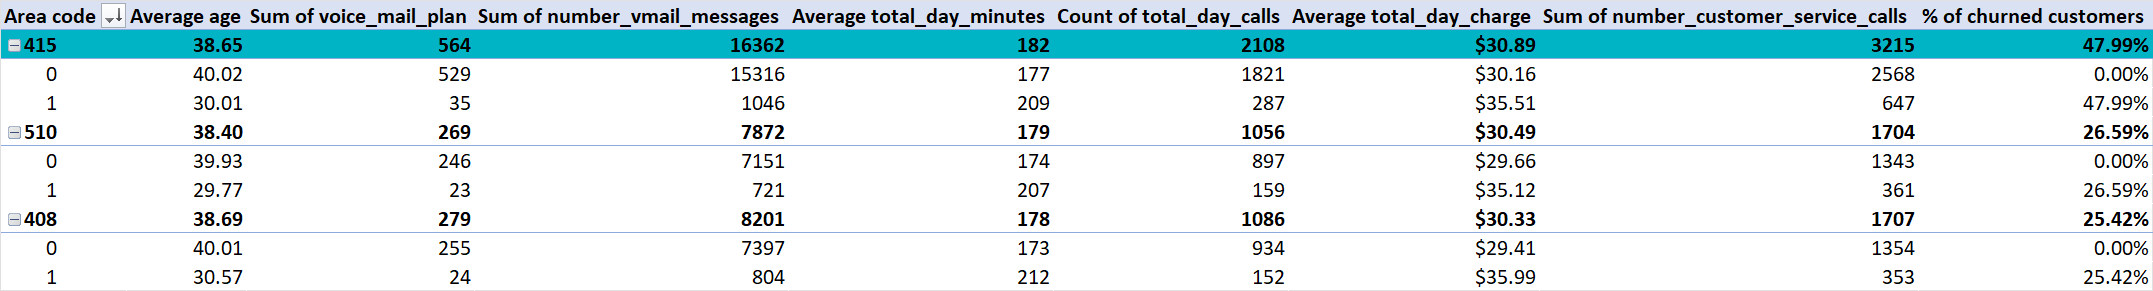

- Data by voicemail plan. Customers without a plan make up `86.29%` of churned customers:

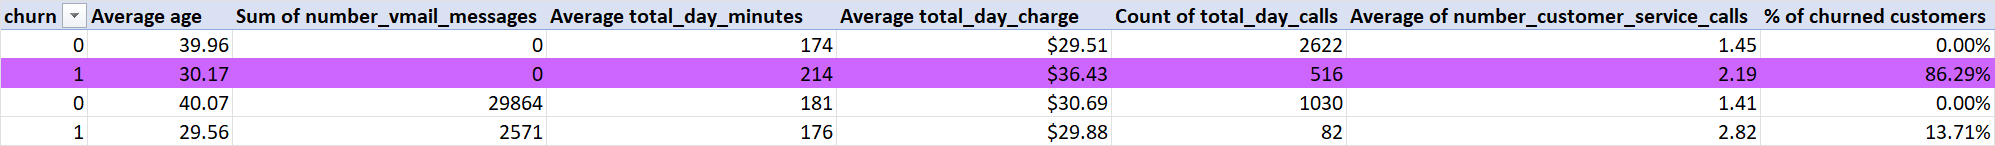

Summary:

- The customers who churned: were younger, less had a voicemail plan, were charged more on average and spent more time on day calls. 
- Except for the top handful of states with most churn, churned customers made more calls to customer service.

### Charts

We now summarise our data with histograms and bar charts, using accessible colours in accordance with [WCAG AA guidelines](https://webaim.org/resources/contrastchecker/).

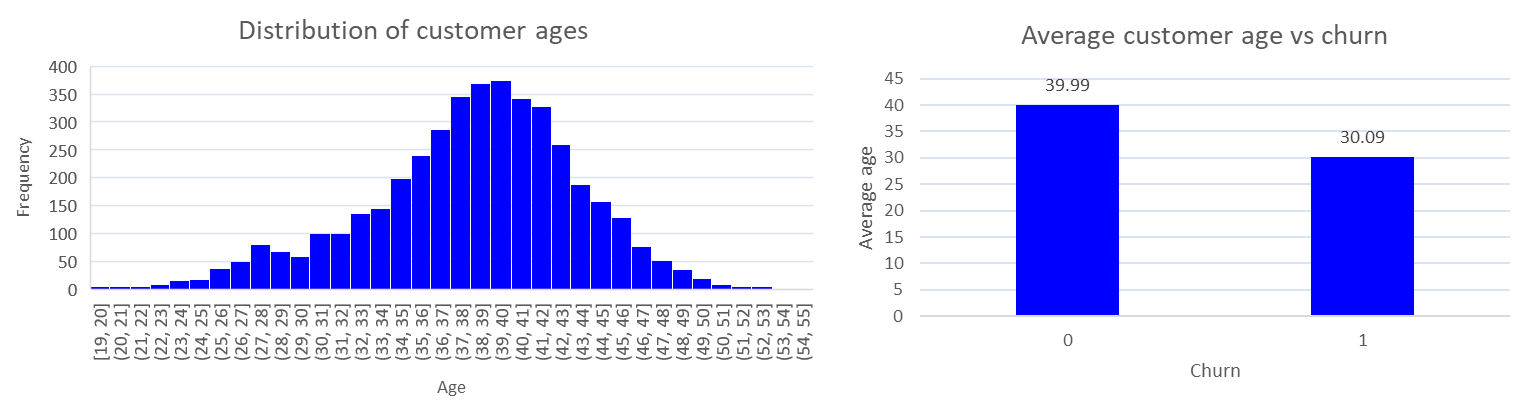

Most customers are aged between 30 and 45. On average, those who churned are around 30, whereas those who didn't churn are around 40.

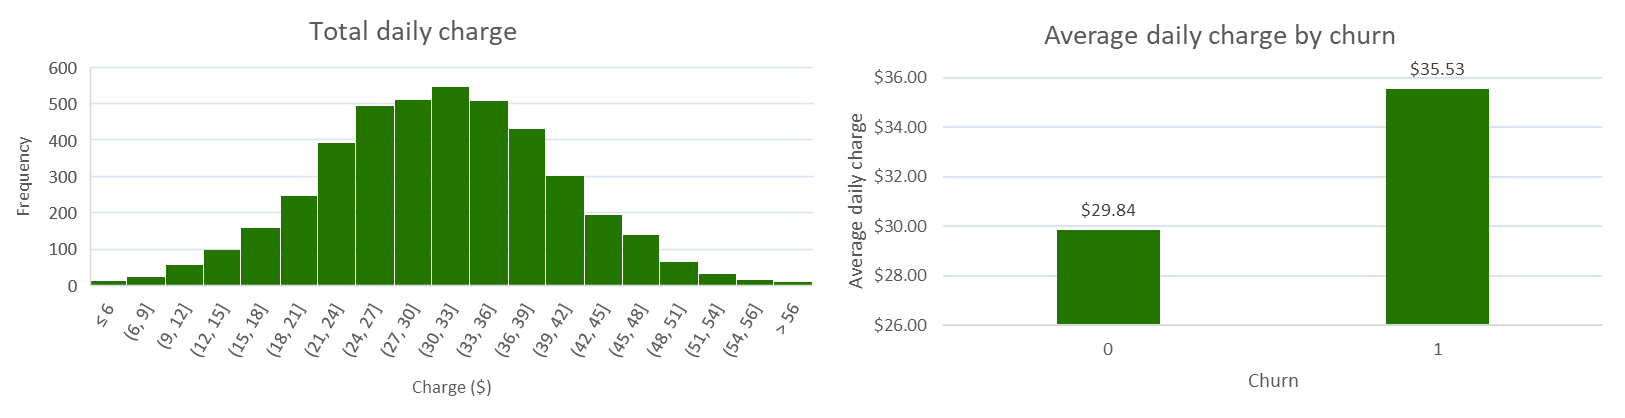

Most customers are charged \\$18-\\$42 per day. On average, those who churned are charged \\$35 a day, compared to around \\$30 for those who didn't churn.

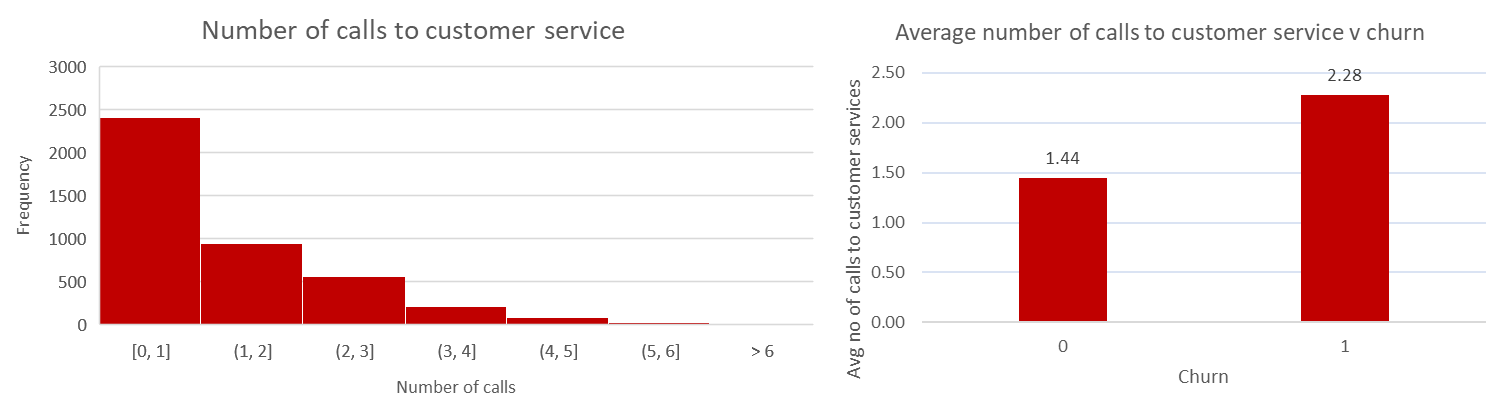

Most customers made less than 2 calls to customer services, however customers who churned made around 2.28 calls to customer service, on average.

### Profile for Customers Likely to Churn

Based on our exploratory data analysis and visualisations, we can surmise that customers who are likely to churn will fit the following profile:

- They are younger.
- They are charged more per day.
- They make more calls to customer service.

### Recommendations

According to our analysis detailed above, and the profile for customers likely to churn, we make the following recommendations to the telecommunication provider for what they can do to retain customers:

- Focus marketing on the younger sector of your customers. For example, by increasing your social media presence.
- Offer deals and discounts to loyal customers to prevent attrition based on charge.
- Pay extra attention to customers who call customer services more than twice: check if they have any recurring/unsolved issues that can be resolved.